# Import libraries

In [69]:
import pandas as pd  # keywords are highlighted in green, other strings in red, etc.
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#for plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
#categorical Variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Round 2 - Dealing with the data

In [2]:
#data_mca.to_csv('./marketing_customer_analysis.csv', index=False) #without indexing column!
data_mca = pd.read_csv('./marketing_customer_analysis.csv')
data_mca.shape

data_mca = data_mca.drop(['Unnamed: 0'], axis=1)
data_mca.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


### Round 2 - #1
Show the dataframe shape

In [3]:
data_mca.shape

(10910, 25)

In [4]:
data_mca.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

### Round 2 - #2
Standardize header names

In [5]:
#Headers without space
data_mca = data_mca.rename(columns={'EmploymentStatus':'Employment Status'})

In [6]:
#Headers all on lower case
mca = []
for mcaname in data_mca.columns:
    mca.append(mcaname.lower())
data_mca.columns = mca

In [7]:
#Headers replace the space by "_"
data_mca.columns = data_mca.columns.str.replace(' ', '_')
data_mca.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

### Round 2 - #3 , #4
Which columns are numerical? Which columns are categorical?

In [8]:
data_mca.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

### Round 2 - #5 
Check and deal with NaN values.

In [9]:
#Check for duplicate rows in the data and remove if any.
sum(data_mca.duplicated()) #check how many rows are duplicated.
data_mca = data_mca.drop_duplicates()
data_mca.isna().sum()

customer                            0
state                             614
customer_lifetime_value             0
response                          614
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           623
months_since_policy_inception       0
number_of_open_complaints         623
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     608
vehicle_size                      608
vehicle_type                     5465
dtype: int64

In [10]:
data_mca_percent = pd.DataFrame(round(data_mca.isna().sum()/len(data_mca),4)*100)
# nulls_df = nulls_df.reset_index()
# nulls_df.columns = ['header_name', 'percent_nulls']
# nulls_df
data_mca_percent

,0
customer,0.00
state,5.65
customer_lifetime_value,0.00
response,5.65
coverage,0.00
education,0.00
effective_to_date,0.00
employment_status,0.00
gender,0.00
income,0.00


In [11]:
# # strategy: drop rows that have null values (only if there are very few)
data_mca[data_mca['state'].isna()==True].head(60)

#We can see that 'state' and 'response' seem to be missing in the same rows. --> drop the rows.

data_mca = data_mca[data_mca['state'].isna()==False]
data_mca
data_mca.isna().sum()
data_mca.shape

(10259, 25)

In [12]:
data_mca[data_mca['months_since_last_claim'].isna()==True].head(60)

#We can see that 'months_since_last_claim' and 'number_of_open_complaints' seem to be missing in the same rows. --> drop the rows.
data_mca = data_mca[data_mca['months_since_last_claim'].isna()==False]
data_mca
data_mca.isna().sum()
#data_mca1.shape

customer                            0
state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     543
vehicle_size                      543
vehicle_type                     4861
dtype: int64

In [13]:
# vehicle_class
data_mca[data_mca['vehicle_class'].isna()==True].head(60)
data_mca['vehicle_class'].unique()
data_mca['vehicle_class'].mode()

data_mca['vehicle_class'].value_counts(dropna=True)
data_mca['vehicle_class'] = data_mca['vehicle_class'].fillna(data_mca['vehicle_class'].value_counts(dropna=True).index[0])

data_mca.isna().sum()

#merged_clean_ver1['state'] = merged_clean_ver1['state'].fillna(merged_clean_ver1['state'].value_counts(dropna=True).index[0])

customer                            0
state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                       0
vehicle_size                      543
vehicle_type                     4861
dtype: int64

In [14]:
# vehicle_size
data_mca[data_mca['vehicle_size'].isna()==True].head(60)
data_mca['vehicle_size'].unique()
data_mca['vehicle_size'].mode()

# --> fill it with the mean
data_mca['vehicle_size'].value_counts(dropna=True)
data_mca['vehicle_size'] = data_mca['vehicle_size'].fillna(data_mca['vehicle_size'].value_counts(dropna=True).index[0])

data_mca.isna().sum()

customer                            0
state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                       0
vehicle_size                        0
vehicle_type                     4861
dtype: int64

In [15]:
# vehicle_type --> nearly 50% is missing ! 
# strategy: input a value for the missing value (fill in a value that we choose or calculate)

data_mca.describe(include=[np.object]).T #--> only 1 unique value and NaN!
# data_mca[data_mca['vehicle_type'].isna()==True].head(60)
data_mca['vehicle_type'].unique()

# Assumption, that we have A = Automatic car and missing so "not Automatic", otherwise we could just drop the column.
data_mca['vehicle_type'] = data_mca['vehicle_type'].fillna('not A') 
data_mca.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

### Round 2 - #6
Datetime format - Extract the months from the dataset and store in a separate column. 
Then filter the data to show only the information for the first quarter , 
ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [16]:
data_mca

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,not A
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,not A
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,not A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,not A


In [17]:
data_mca.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

In [18]:
#where is a date / month?
data_mca.dtypes #no "date" there
#data_mca['effective_to_date']
data_mca['effective_to_date'] = pd.to_datetime(data_mca['effective_to_date'], errors='coerce')
data_mca.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,not A
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,not A
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,not A


In [19]:
data_mca['effective_to_date_month'] = data_mca['effective_to_date'].dt.month
data_mca

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,not A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,not A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,not A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,not A,2


In [20]:
data_mca['effective_to_date_month'].unique() # --> irritating, this means we have only information for Q1...

data_mca_Q1 = data_mca[(data_mca['effective_to_date_month']==1) | (data_mca['effective_to_date_month']==2) | (data_mca['effective_to_date_month']==3)]
data_mca_Q1
#data[(data['target_d']<100) & (data['gender']=='F')]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,not A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,not A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,not A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,not A,2


### Round 2 - #7
#BONUS: Put all the previously mentioned data transformations into a function.

In [21]:
# Now define a function to clean the dataframe

def clean_dataframe(x):
    ## Standardize Headers
    #Drop the first "Unnamed: 0" column
    if 'Unnamed: 0' in x.columns:
        x = x.drop(['Unnamed: 0'], axis=1)
    else:
        x = x
    #Headers all on lower case and replace the space by "_"
    header = []
    for item in x.columns:
        header.append(item.lower().replace(' ', '_'))
    x.columns = header
    #Headers without space
    x = x.rename(columns={'EmploymentStatus':'Employment Status'})
    
    ## Check for duplicates
    x = x.drop_duplicates()
    
    ## taking care of the NAN-Values:
    #droping the NAN-Values for 'state' and 'response'
    x = x[x['state'].isna()==False]
    #droping the NAN-Values for 'months_since_last_claim' and 'number_of_open_complaints'
    x = x[x['months_since_last_claim'].isna()==False]
    #fill the 'vehicle_class' with the mean value
    x['vehicle_class'] = x['vehicle_class'].fillna(x['vehicle_class'].value_counts(dropna=True).index[0])
    #fill the 'vehicle_size' with the mean value
    x['vehicle_size'] = x['vehicle_size'].fillna(x['vehicle_size'].value_counts(dropna=True).index[0])
    #fill the NAN of vehicle_type with 'not A', because 50%
    x['vehicle_type'] = x['vehicle_type'].fillna('not A')
    #
    x['effective_to_date'] = pd.to_datetime(x['effective_to_date'], errors='coerce')
    x['effective_to_date_month'] = x['effective_to_date'].dt.month
    return x


# Round 3 - EDA (Exploratory Data Analysis)

###  Round 3 - #1 , #2
Show DataFrame info, Describe Data Frame

In [22]:
# describing the numerical columns
summary_numerical = data_mca.describe().T 
summary_numerical

#DataFrame info
info_data = data_mca.info()
info_data

# additionnaly we add the range and the iqr
summary_numerical['iqr'] = summary_numerical['75%']-summary_numerical['25%']

summary_numerical['range'] = summary_numerical['max']-summary_numerical['min']
summary_numerical

#round up the values to 2 decimals (round() would round to 0 decimals) --> with function
def roundforme(x):
    return round(x,2)

#to round the whole table..
for col in summary_numerical.columns:
    summary_numerical[col] = summary_numerical[col].apply(roundforme)
summary_numerical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9677 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9677 non-null   object        
 1   state                          9677 non-null   object        
 2   customer_lifetime_value        9677 non-null   float64       
 3   response                       9677 non-null   object        
 4   coverage                       9677 non-null   object        
 5   education                      9677 non-null   object        
 6   effective_to_date              9677 non-null   datetime64[ns]
 7   employment_status              9677 non-null   object        
 8   gender                         9677 non-null   object        
 9   income                         9677 non-null   int64         
 10  location_code                  9677 non-null   object        
 11  marital_status  

,count,mean,std,min,25%,50%,75%,max,iqr,range
customer_lifetime_value,9677.0,8042.07,6962.49,1898.01,3991.73,5771.61,8986.61,83325.38,4994.88,81427.37
income,9677.0,37675.18,30380.91,0.00,0.00,34080.00,62291.00,99981.00,62291.00,99981.00
monthly_premium_auto,9677.0,93.21,34.47,61.00,68.00,83.00,109.00,298.00,41.00,237.00
months_since_last_claim,9677.0,15.13,10.06,0.00,6.00,14.00,23.00,35.00,17.00,35.00
months_since_policy_inception,9677.0,48.13,27.91,0.00,24.00,48.00,71.00,99.00,47.00,99.00
number_of_open_complaints,9677.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00,0.00,5.00
number_of_policies,9677.0,2.96,2.39,1.00,1.00,2.00,4.00,9.00,3.00,8.00
total_claim_amount,9677.0,434.38,291.48,0.10,272.65,383.17,547.20,2893.24,274.55,2893.14
effective_to_date_month,9677.0,1.46,0.50,1.00,1.00,1.00,2.00,2.00,1.00,1.00


In [23]:
# describing the object columns
summary_objects = data_mca.describe(include=[np.object]).T
summary_objects

,count,unique,top,freq
customer,9677,9134,BG42047,3
state,9677,5,California,3344
response,9677,2,No,8289
coverage,9677,3,Basic,5905
education,9677,5,Bachelor,2913
employment_status,9677,5,Employed,6035
gender,9677,2,F,4934
location_code,9677,3,Suburban,6126
marital_status,9677,3,Married,5605
policy_type,9677,3,Personal Auto,7208


In [24]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

###  Round 3 - #3
Show a plot of the total number of responses.

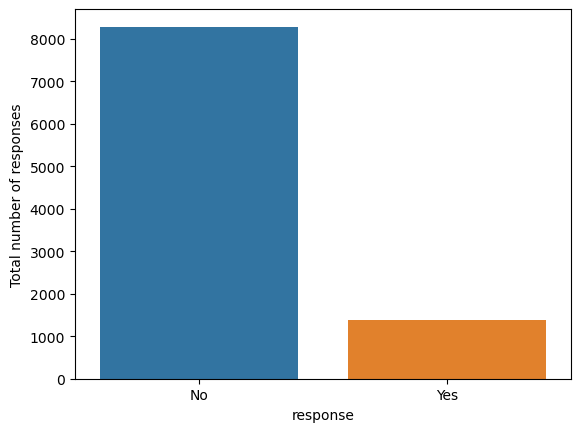

In [25]:
sns.countplot(x=data_mca['response'])
plt.ylabel('Total number of responses')
plt.show()

###  Round 3 - #4
Show a plot of the response rate by the sales channel.

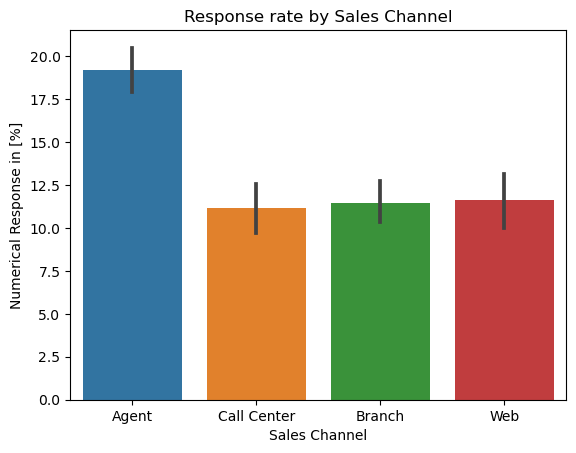

In [26]:
import matplotlib.pyplot as plt
data_mca['numerical_response'] = data_mca['response'].map(dict(Yes=1,No=0))*100 #in %!
data_mca

sns.barplot(x="sales_channel", y="numerical_response", data=data_mca)

plt.xlabel("Sales Channel")
plt.ylabel("Numerical Response in [%]")
plt.title("Response rate by Sales Channel") # You can comment this line out if you don't need title
#axes.set(ylim=(0, 100))
plt.show()


###  Round 3 - #5
Show a plot of the response rate by the total claim amount.

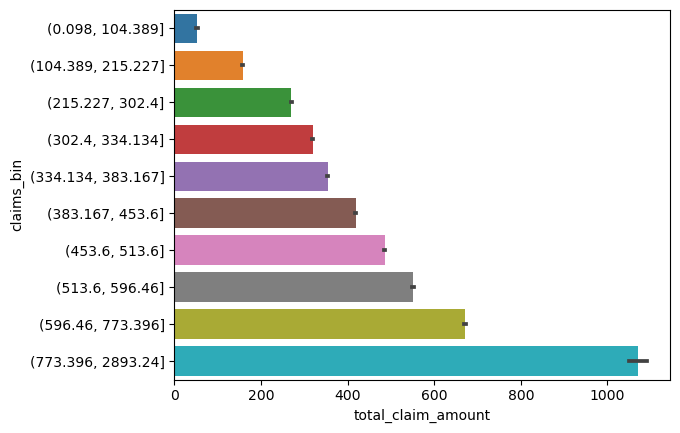

In [27]:
#perform data binning on points variable with specific quantiles and labels
data_mca['claims_bin'] = pd.qcut(data_mca['total_claim_amount'], q=10)
data_mca

sns.barplot(x = data_mca['total_claim_amount'],y=data_mca['claims_bin'] ,data=data_mca)
plt.show()

###  Round 3 - #6
Show a plot of the response rate by income

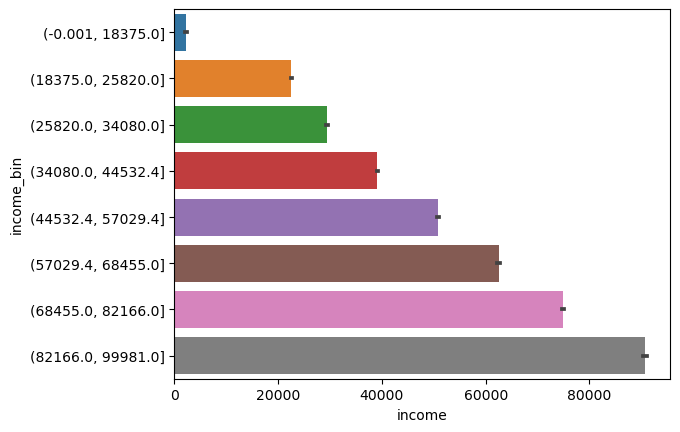

In [28]:
data_mca['income_bin'] = pd.qcut(data_mca['income'], q=10, duplicates='drop')
# data_mca['income_bin'] = numpy.round_(data_mca['income_bin'], decimals = 0, out = None)
# data_mca['income_bin'] = [ round(elem, 2) for elem in data_mca['income_bin'] ]
data_mca

sns.barplot(x = data_mca['income'],y=data_mca['income_bin'] ,data=data_mca)
plt.show()

# Round 4 - Processing Data

###  Round 4 - #1
Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [29]:
# data types
data_mca.dtypes

categoricals = data_mca.select_dtypes(include=np.object)
categoricals

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,not A
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,not A
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
6,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,not A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
10904,QI63521,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,not A


In [30]:
numerical = data_mca.select_dtypes(include=np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_month,numerical_response
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,0
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,100
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2,0
...,...,...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1,0
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,2,0
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1,0
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2,0


###  Round 4 - #2
Now we will try to check the normality of the numerical variables visually.

#### Round 4 - #2.1
Use seaborn library to construct distribution plots for the numerical variables

In [31]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'effective_to_date_month', 'numerical_response'],
      dtype='object')

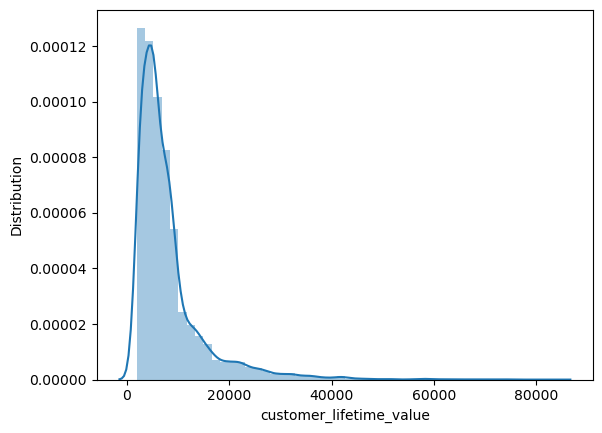

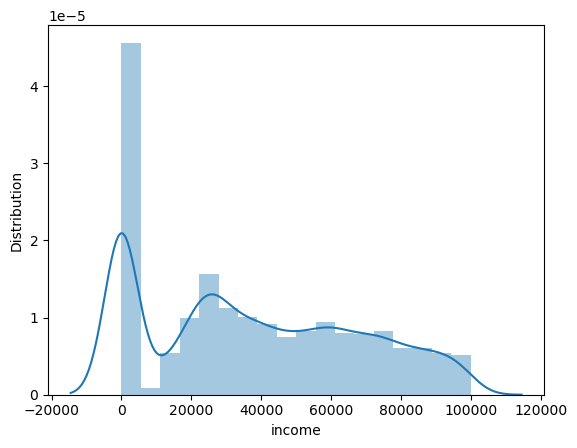

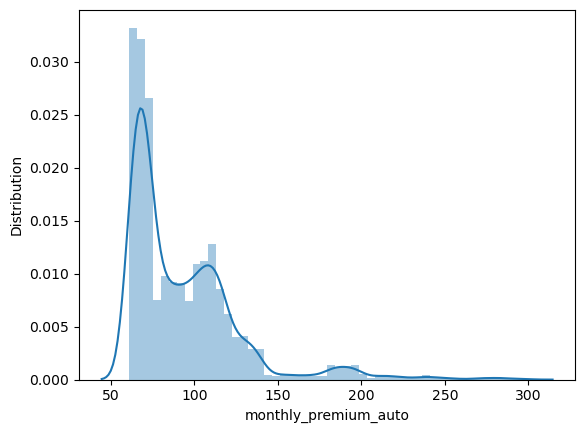

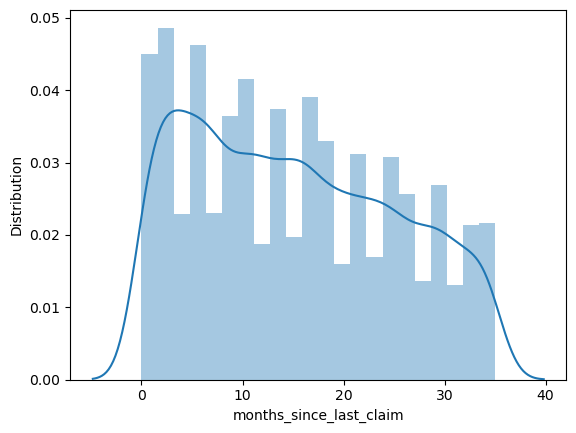

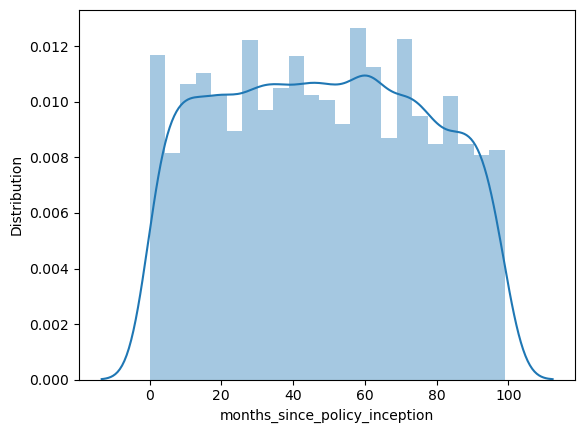

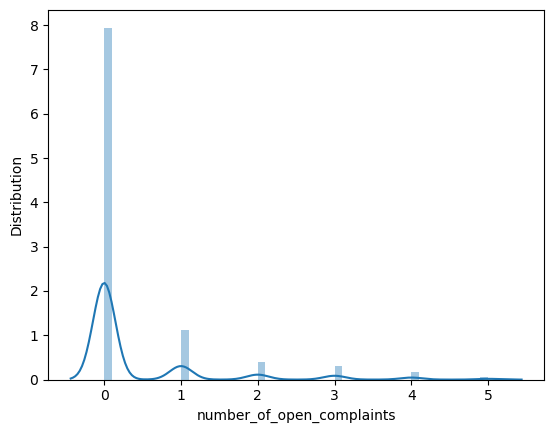

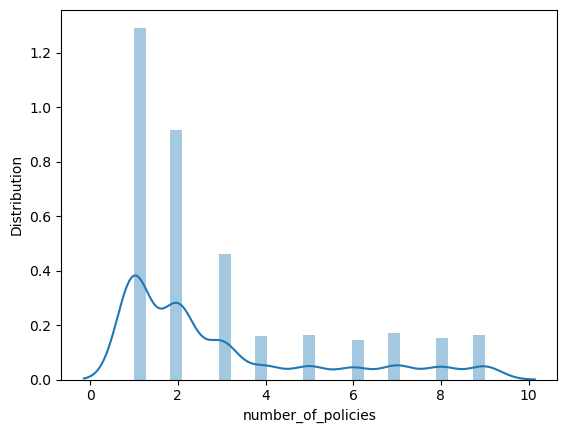

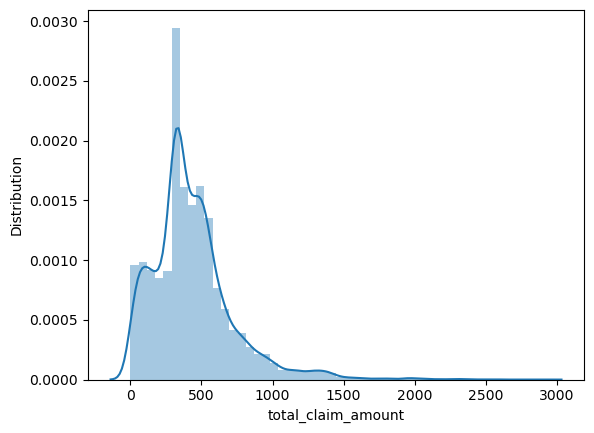

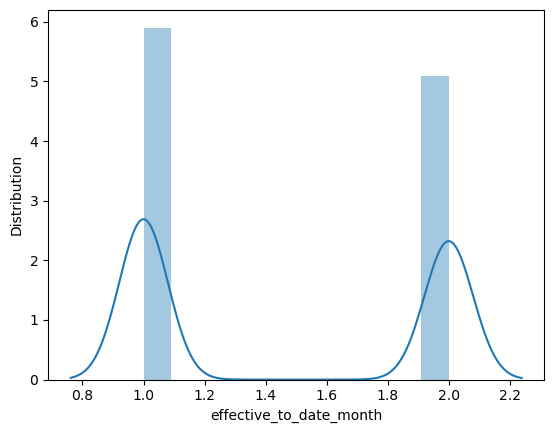

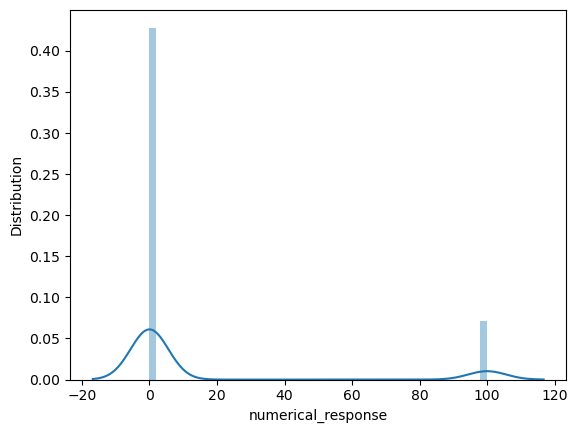

In [32]:
for i in numerical.columns:
    sns.distplot(numerical,x=numerical[i])
    plt.xlabel(i)
    plt.ylabel('Distribution')
    plt.show()

#### Round 4 - #2.2
Use Matplotlib to construct histograms

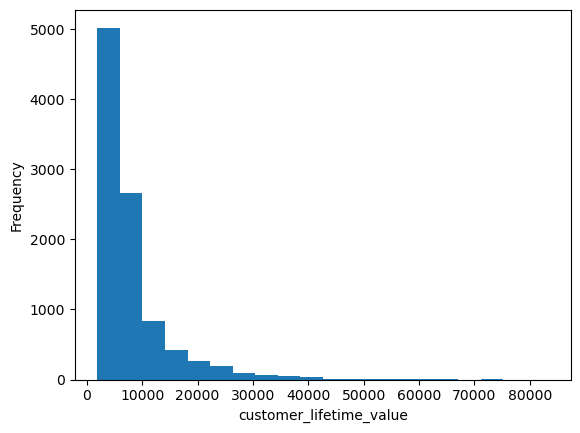

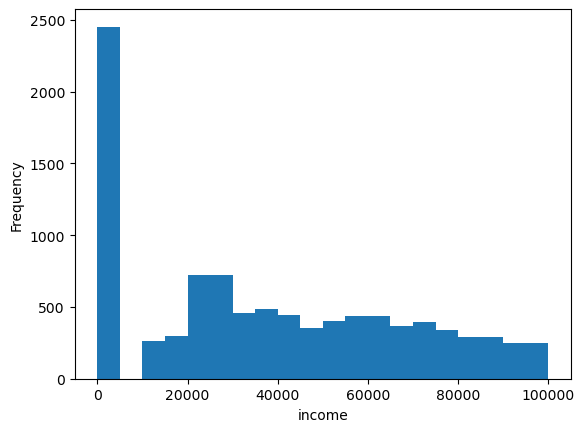

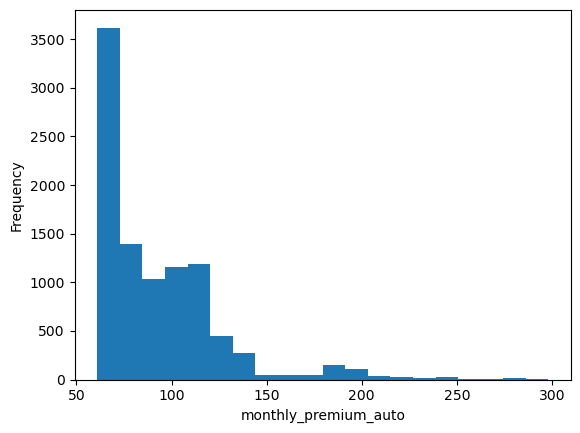

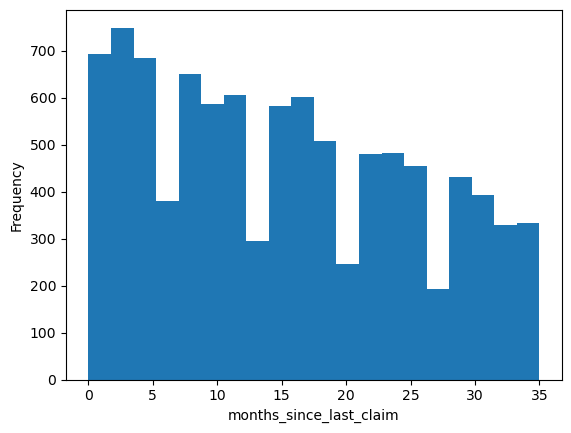

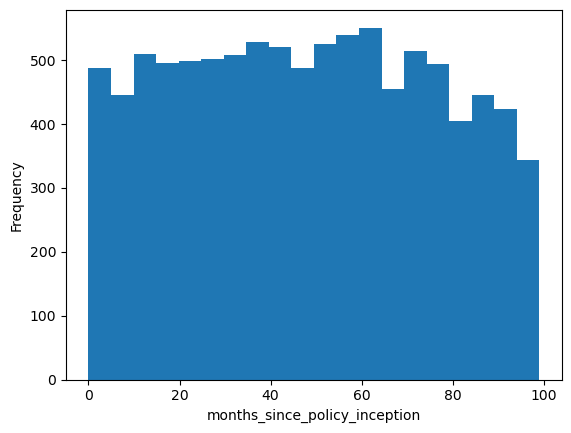

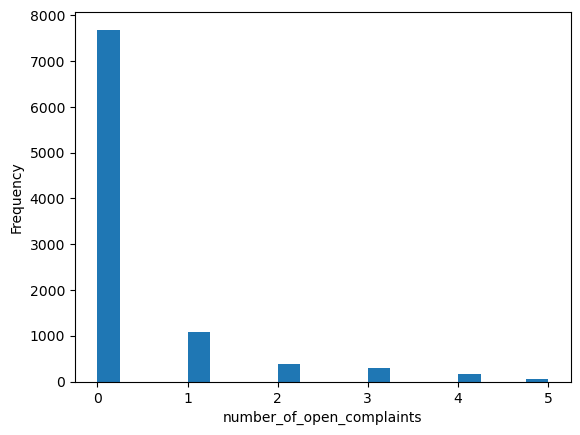

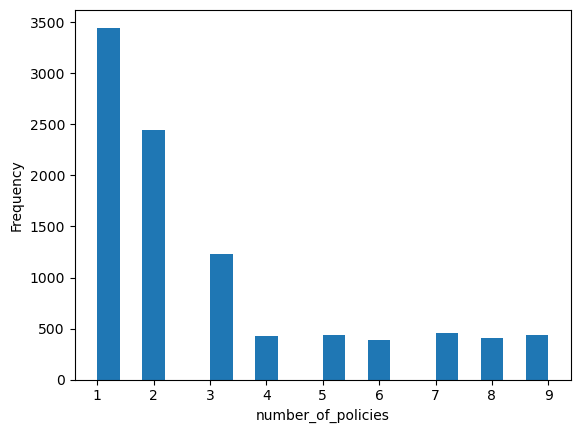

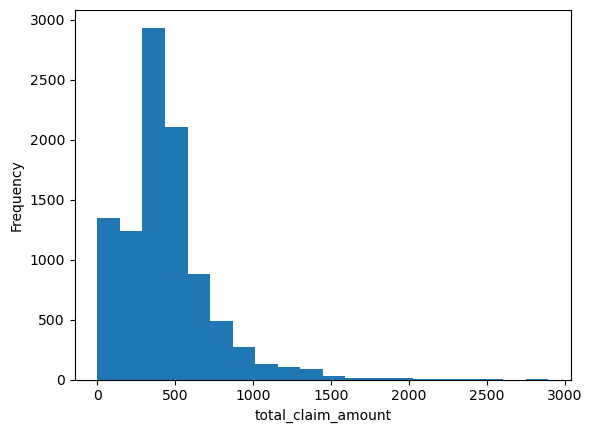

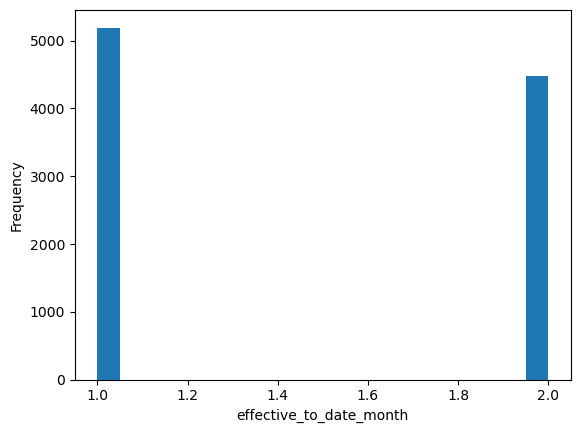

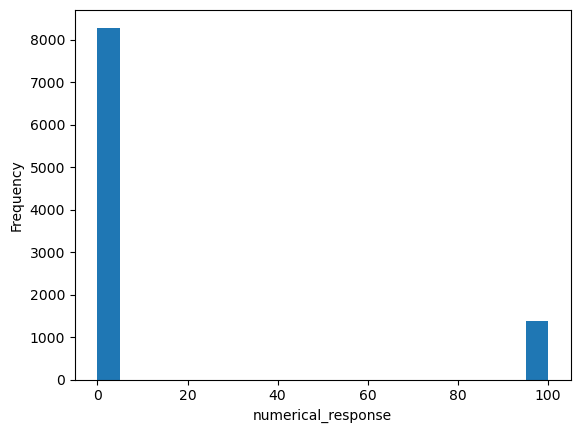

In [33]:
# https://matplotlib.org/stable/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py

for i in numerical.columns:
    plt.hist(numerical[i], bins=20)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()


#### Round 4 - #2.3
Do the distributions for different numerical variables do look like a normal distribution?

The Distribution of the Customer Lifetime Value looks normally distributed. 
Total Claim Amount looks somewhat normally distributed

#### Round 4 - #3 - #4
For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [34]:
correlations_matrix = numerical.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_month,numerical_response
customer_lifetime_value,1.000000,0.026331,0.400945,0.016155,0.009627,-0.029744,0.017753,0.232341,-0.007731,-0.006814
income,0.026331,1.000000,-0.011261,-0.021656,-0.005237,0.004273,-0.009108,-0.351929,-0.003909,0.012270
monthly_premium_auto,0.400945,-0.011261,1.000000,0.007207,0.022144,-0.009312,-0.016843,0.632301,0.009768,0.014038
months_since_last_claim,0.016155,-0.021656,0.007207,1.000000,-0.039308,0.006001,0.007084,0.009902,-0.021173,-0.015350
months_since_policy_inception,0.009627,-0.005237,0.022144,-0.039308,1.000000,0.001808,-0.011412,0.007128,0.011822,-0.001161
number_of_open_complaints,-0.029744,0.004273,-0.009312,0.006001,0.001808,1.000000,0.001612,-0.008830,-0.007672,-0.005225
number_of_policies,0.017753,-0.009108,-0.016843,0.007084,-0.011412,0.001612,1.000000,-0.006329,0.007217,-0.018269
total_claim_amount,0.232341,-0.351929,0.632301,0.009902,0.007128,-0.008830,-0.006329,1.000000,0.005696,0.019248
effective_to_date_month,-0.007731,-0.003909,0.009768,-0.021173,0.011822,-0.007672,0.007217,0.005696,1.000000,-0.034297
numerical_response,-0.006814,0.012270,0.014038,-0.015350,-0.001161,-0.005225,-0.018269,0.019248,-0.034297,1.000000


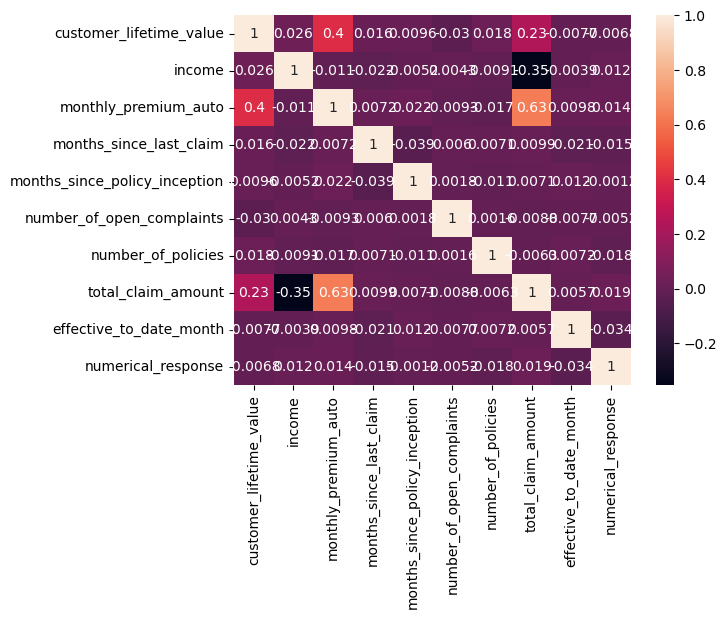

In [35]:
#heatmap
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [36]:
# 0.9 and 1.0 very highly correlated
# 0.7 and 0.9 highly correlated
# 0.5 and 0.7 moderately correlated
# 0.3 and 0.5 low correlation
# less than 0.3 little if any (linear) correlation. 

# Target Value: Total Claim Amount 
# is moderately correlated with monthly_premium_auto (0.63)
# is lowly correlated with income (-0.35)

# There is no correlation between monthly premium auto and income (-0.0014)

In [37]:
# reduced_numerical = numerical[['total_claim_amount', 'income', 'monthly_premium_auto']]
# reduced_numerical.columns

# Round 5 - Processing Data

#### Round 5 - #1 X-y split

In [38]:
y = data_mca['total_claim_amount']
X = data_mca.drop(['total_claim_amount'], axis=1)
X.head()
X.shape
display(X)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month,numerical_response,claims_bin,income_bin
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,not A,2,0,"(215.227, 302.4]","(44532.4, 57029.4]"
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,not A,1,0,"(596.46, 773.396]","(-0.001, 18375.0]"
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal L3,Offer3,Call Center,SUV,Medsize,A,2,0,"(453.6, 513.6]","(18375.0, 25820.0]"
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,1,100,"(453.6, 513.6]","(44532.4, 57029.4]"
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,not A,2,0,"(215.227, 302.4]","(34080.0, 44532.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A,1,0,"(334.134, 383.167]","(57029.4, 68455.0]"
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A,2,0,"(773.396, 2893.24]","(-0.001, 18375.0]"
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,1,0,"(215.227, 302.4]","(57029.4, 68455.0]"
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate L3,Offer1,Web,Luxury SUV,Medsize,not A,2,0,"(334.134, 383.167]","(34080.0, 44532.4]"


In [39]:
#Dropping useless columns
X = X.drop(['effective_to_date_month', 'numerical_response', 'customer','effective_to_date','income_bin','claims_bin'],axis=1)
X.head()
X.shape

(9677, 22)

In [40]:
X.dtypes

state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
vehicle_class                     object
vehicle_size                      object
vehicle_type                      object
dtype: object

In [41]:
X_num = X.select_dtypes(np.number)
X_cat = X.select_dtypes(object)

In [42]:
X_num.shape

(9677, 7)

In [43]:
X_cat.shape

(9677, 15)

#### Round 5 - #2 Normalize (numerical)

In [44]:
# Normalization or Min-Max Scaling is used to transform features to be on a similar scale. 

# The new point is calculated as:
# X_new = (X - X_min)/(X_max - X_min)

# This scales the range to [0, 1] or sometimes [-1, 1]. 
# Geometrically speaking, transformation squishes the n-dimensional data into an n-dimensional 
# unit hypercube. Normalization is useful when there are no outliers as it cannot cope up with 
# them. Usually, we would scale age and not incomes because only a few people have high incomes 
# but the age is close to uniform.

In [45]:
# This is the code for the MIN-MAX-Normalizing, in this lab I chose to do the Standard Normalizing, 
# because it takes into account more the outliers.

# y = numerical['total_claim_amount']
# X = numerical.drop(['total_claim_amount'], axis=1)

# # Normalizing data: make data range from 0 - 1, instead of from min to max
# transformer = MinMaxScaler().fit(X)
# x_normalized = transformer.transform(X)
# print(x_normalized.shape)
# x_normalized
# pd.DataFrame(x_normalized, columns=X.columns)

In [46]:
# Standardization or Z-Score Normalization is the transformation of features 
# by subtracting from mean and dividing by standard deviation. This is often called as Z-score.

# X_new = (X - mean)/Std

# Standardization can be helpful in cases where the data follows a Gaussian distribution. 
# However, this does not have to be necessarily true. Geometrically speaking, it translates 
# the data to the mean vector of original data to the origin and squishes or expands the 
# points if std is 1 respectively. We can see that we are just changing mean and standard 
# deviation to a standard normal distribution which is still normal thus the shape of the 
# distribution is not affected.

# Standardization does not get affected by outliers because there is no predefined range of transformed features.

In [47]:
transformer = StandardScaler().fit(X_num)
X_num_standardized = transformer.transform(X_num)
print(X_num_standardized.shape)

X_num_standardized= pd.DataFrame(X_num_standardized, columns=X_num.columns)
X_num_standardized

(9677, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.464349,0.340818,-0.934481,-0.807710,0.138576,-0.421087,2.530453
1,-0.835025,-1.240158,-0.847445,-1.205268,-0.793022,-0.421087,-0.820916
2,0.991916,-0.511406,0.196986,1.875812,-0.613868,-0.421087,-0.401995
3,2.052587,0.375348,0.109950,-0.509540,-1.617127,-0.421087,-0.401995
4,-0.431914,-0.008894,-0.876457,-0.708320,1.822618,2.873947,0.435848
...,...,...,...,...,...,...,...
9672,-0.757012,0.730095,-0.557326,1.478254,1.213496,3.972291,-0.820916
9673,1.606749,-1.240158,2.721028,-0.111982,-0.578038,-0.421087,-0.401995
9674,-0.399681,0.772591,-0.818433,-0.807710,0.711867,-0.421087,1.273690
9675,2.276780,0.071161,3.127196,-0.410151,0.532713,-0.421087,-0.401995


# Round 6 - Processing Data, Linear Regression, Model Validation

#### Round 6 - Processing Data - #1 One Hot/Label Encoding (categorical).

In [48]:
X_cat.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,not A
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,not A
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
6,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,not A


In [49]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns
# from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat) # the first one is the most frequent one.
#print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
#print(encoded)

cols = encoder.get_feature_names(input_features=X_cat.columns)
cols

onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded.head()
onehot_encoded.shape

(9677, 44)

#### Round 6 - Processing Data - #2 Concat DataFrames

In [50]:
X = pd.concat([X_num_standardized, onehot_encoded], axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_not A
0,-0.464349,0.340818,-0.934481,-0.807710,0.138576,-0.421087,2.530453,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.835025,-1.240158,-0.847445,-1.205268,-0.793022,-0.421087,-0.820916,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.991916,-0.511406,0.196986,1.875812,-0.613868,-0.421087,-0.401995,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2.052587,0.375348,0.109950,-0.509540,-1.617127,-0.421087,-0.401995,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.431914,-0.008894,-0.876457,-0.708320,1.822618,2.873947,0.435848,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9672,-0.757012,0.730095,-0.557326,1.478254,1.213496,3.972291,-0.820916,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9673,1.606749,-1.240158,2.721028,-0.111982,-0.578038,-0.421087,-0.401995,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9674,-0.399681,0.772591,-0.818433,-0.807710,0.711867,-0.421087,1.273690,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9675,2.276780,0.071161,3.127196,-0.410151,0.532713,-0.421087,-0.401995,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Round 6 - Linear Regression - #3 Train-test split.

In [56]:
y = y.reset_index(drop=True)
onehot_encoded=onehot_encoded.reset_index(drop=True)

total_claim_amount                 1.000000
state_California                        NaN
state_Nevada                            NaN
state_Oregon                            NaN
state_Washington                        NaN
response_Yes                            NaN
coverage_Extended                       NaN
coverage_Premium                        NaN
education_College                       NaN
education_Doctor                        NaN
education_High School or Below          NaN
education_Master                        NaN
employment_status_Employed        -0.332703
employment_status_Medical Leave         NaN
employment_status_Retired               NaN
employment_status_Unemployed       0.329374
gender_M                                NaN
location_code_Suburban             0.575567
location_code_Urban                     NaN
marital_status_Married                  NaN
marital_status_Single                   NaN
policy_type_Personal Auto               NaN
policy_type_Special Auto        

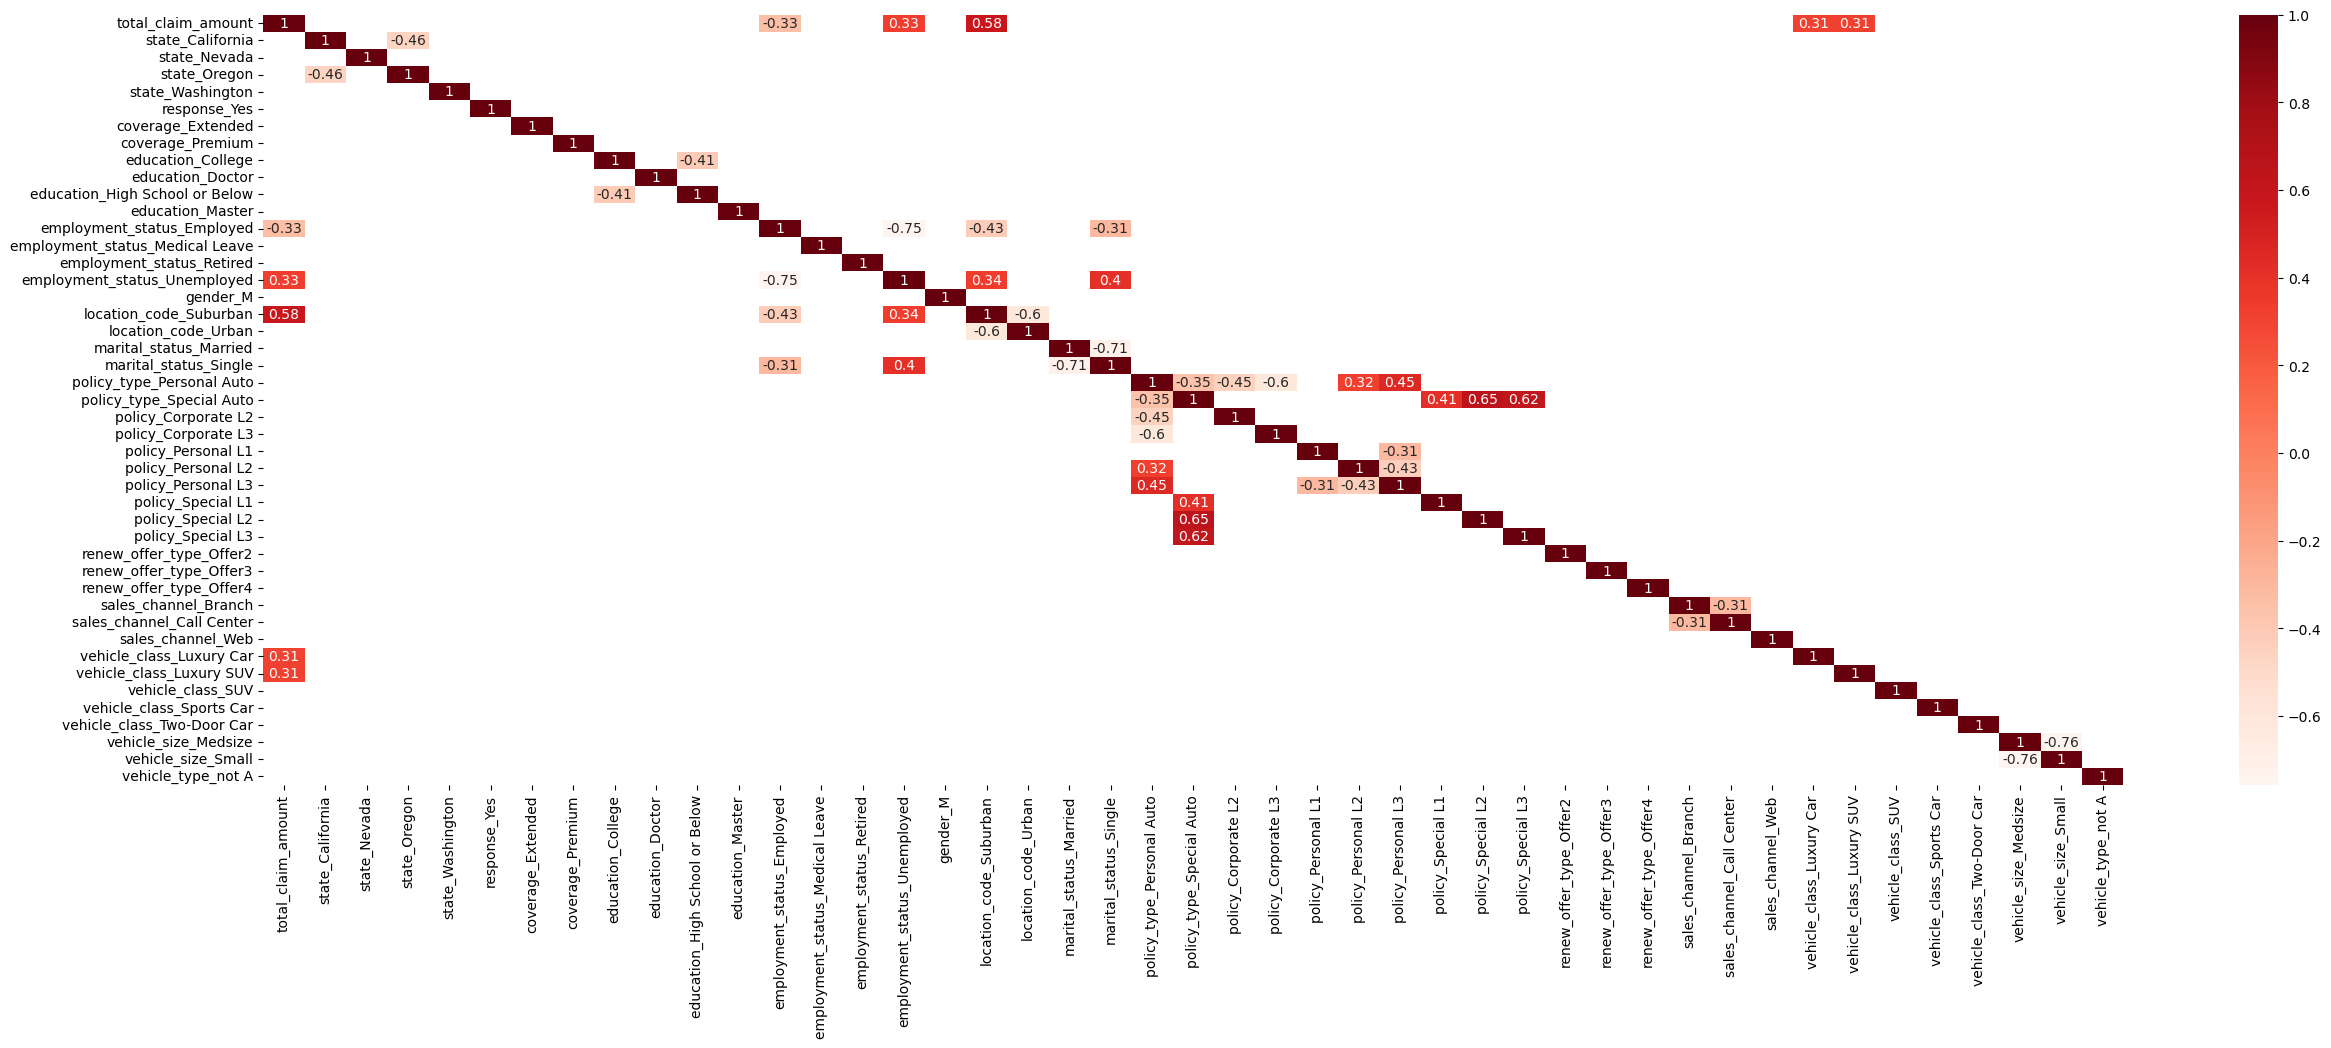

In [57]:
###
# 0.9 and 1.0 very highly correlated
# 0.7 and 0.9 highly correlated
# 0.5 and 0.7 moderately correlated
# 0.3 and 0.5 low correlation
# less than 0.3 little if any (linear) correlation. 
###

### From numericals:
# Target Value: Total Claim Amount 
# is moderately correlated with monthly_premium_auto (0.63)
# is lowly correlated with income (-0.35)
# There is no correlation between monthly premium auto and income (-0.0014)

### Now we do the correlation for the categoricals:

Collinearity = pd.concat((y, onehot_encoded), axis=1)
Collinearity

corr_matrix_cat = Collinearity.corr()
corr_matrix_cat #44x44-matrix!
#print(corr_matrix_cat.iloc[0])

filtered_matrix = corr_matrix_cat[((corr_matrix_cat >= .3) | (corr_matrix_cat <= -.3))]
filtered_matrix
print(filtered_matrix.iloc[0])

plt.figure(figsize=(30,10))
sns.heatmap(filtered_matrix, annot=True, cmap="Reds")
plt.show()

### Result from categoricals:
# Target Value: Total Claim Amount
# is lowly correlated with employment_status_Employed (-0.33)
# is lowly correlated with employment_status_Unemployed (-0.32)
# is moderately correlated with location_code_Suburban (0.57)
# is lowly correlated with vehicle_class_Luxury Car (0.31)
# is lowly correlated with vehicle_class_Luxury SUV (0.31)

In [58]:
y # ['total_claim_amount'] from above.  
X = X[['monthly_premium_auto', 'income', 'employment_status_Employed','employment_status_Unemployed','location_code_Suburban','vehicle_class_Luxury Car', 'vehicle_class_Luxury SUV']]
X

,monthly_premium_auto,income,employment_status_Employed,employment_status_Unemployed,location_code_Suburban,vehicle_class_Luxury Car,vehicle_class_Luxury SUV
0,-0.934481,0.340818,1.0,0.0,1.0,0.0,0.0
1,-0.847445,-1.240158,0.0,1.0,1.0,0.0,0.0
2,0.196986,-0.511406,1.0,0.0,1.0,0.0,0.0
3,0.109950,0.375348,1.0,0.0,1.0,0.0,0.0
4,-0.876457,-0.008894,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
9672,-0.557326,0.730095,1.0,0.0,1.0,0.0,0.0
9673,2.721028,-1.240158,0.0,1.0,1.0,0.0,1.0
9674,-0.818433,0.772591,1.0,0.0,0.0,0.0,0.0
9675,3.127196,0.071161,1.0,0.0,0.0,0.0,1.0


In [59]:
# We do the Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7741, 7)
(1936, 7)
(7741,)
(1936,)


In [61]:
# We caculate the linear regression based on the "train"-data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

print("b0 = " , lm.intercept_)
print("b1 = " , lm.coef_)

b0 =  227.2864849178339
b1 =  [167.40976743  -7.76955929  -0.50341215  97.17367037 285.92382052
  83.77542508  44.23600063]


#### Round 6 - Linear Regression -  #4 Apply linear regression.

In [63]:
# We compare the predicted y-data (applied linear regression on x_train) and compare it with our y_train data.
predictions = lm.predict(X_train)
r2_score(y_train, predictions)
# our r2 score is good.

0.702196270984411

#### Round 6 - Model Validation -  #5 Description R2

In [65]:
# We apply the linear regression on the x-test and compare it with our y-test
predictions_test = lm.predict(X_test)
R2 = r2_score(y_test, predictions_test)
print("R2-score is ", R2)
# our r2 score is even better

R2-score is  0.7203458040591263


In [71]:
y_test[:5]

8528    292.800000
3540    619.200000
7331    299.356083
7920    537.600000
1631    504.000000
Name: total_claim_amount, dtype: float64

In [72]:
predictions_test[:5]

array([361.72756393, 689.22440384, 196.82364808, 603.15059833,
       569.15161158])

#### Round 6 - Model Validation -  #6 Description MSE

In [76]:
mse=mean_squared_error(y_test,predictions_test)
mse
print("mean squared error (MSE) is ", mse)

# --> the mean squared error is the error ^2 so the error seems extremely large! that is why to have a 
# better understanding/relation with the data, the RMSE is more "relatable"

mean squared error (MSE) is  21780.55771867215


#### Round 6 - Model Validation -  #7 Description RMSE

In [74]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse
print("root mean squared error (RMSE) is ", rmse)

# --> the RMSE is compared to the five couples (y_test[:5] and predictions_test[:5]) much higher, than expected..
# 

root mean squared error (RMSE) is  147.58237604359184


#### Round 6 - Model Validation -  #8 Description MAE

In [75]:
mae = mean_absolute_error(y_test, predictions_test)
print("mean absolute error (MAE) is ", mae)

mean absolute error (MAE) is  109.21649592507937
